<a href="https://colab.research.google.com/github/sreevarsha20/wind-turbine-power-prediction/blob/main/Wind_Turbine_Power_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🌀 Wind Turbine Power Prediction using Machine Learning

 📦 Step 1: Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

📂 Step 2: Load Dataset

In [ ]:
url = "https://raw.githubusercontent.com/sreevarsha20/wind-turbine-power-prediction/refs/heads/main/data/wind_turbine_data.csv"
df = pd.read_csv(url)

# Preview data
print("✅ Dataset loaded successfully!")
df.head()

✅ Dataset loaded successfully!


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


🧹 Step 3: Data Preprocessing

In [ ]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Drop duplicates if any
df = df.drop_duplicates()

# Fill missing values (if any)
df = df.fillna(method='ffill')

# Check data types and info
print("\nDataset Info:")
print(df.info())


Missing values per column:
Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB
None


/tmp/ipython-input-1516413384.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


📊 Step 4: Exploratory Data Analysis


Summary Statistics:
       LV ActivePower (kW)  Wind Speed (m/s)  Theoretical_Power_Curve (KWh)  \
count         50530.000000      50530.000000                   50530.000000   
mean           1307.684332          7.557952                    1492.175463   
std            1312.459242          4.227166                    1368.018238   
min              -2.471405          0.000000                       0.000000   
25%              50.677890          4.201395                     161.328167   
50%             825.838074          7.104594                    1063.776283   
75%            2482.507568         10.300020                    2964.972462   
max            3618.732910         25.206011                    3600.000000   

       Wind Direction (°)  
count        50530.000000  
mean           123.687559  
std             93.443736  
min              0.000000  
25%             49.315437  
50%             73.712978  
75%            201.696720  
max            359.997589  


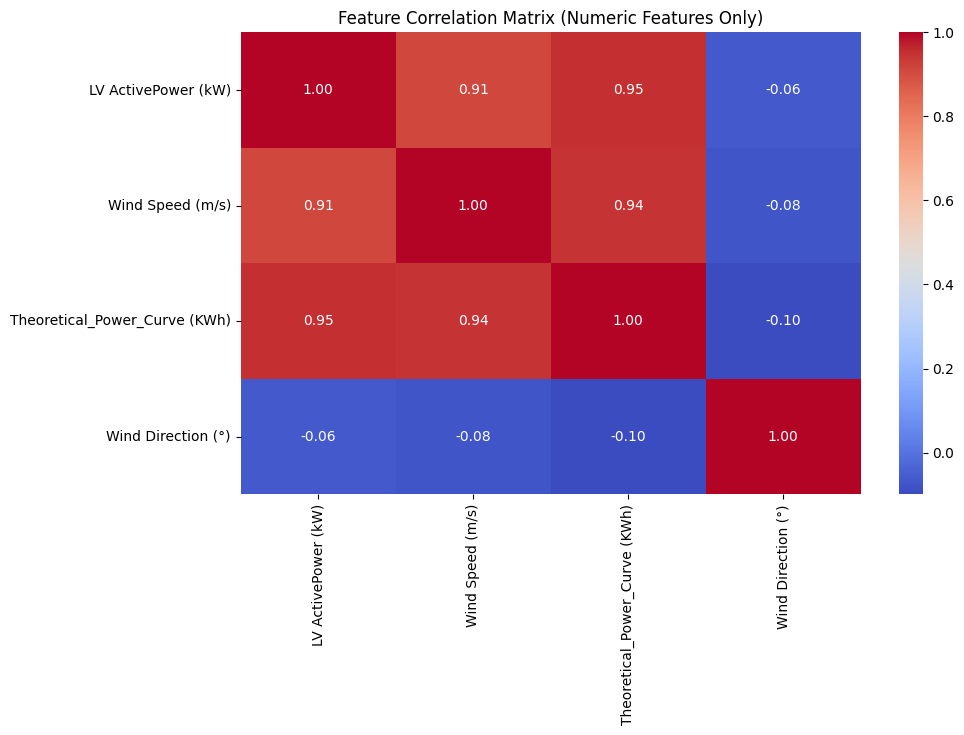

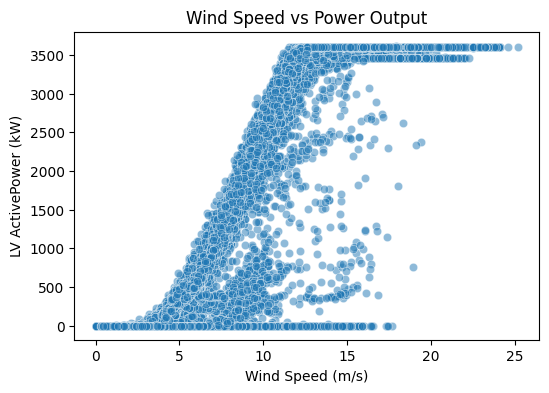

In [9]:

print("\nSummary Statistics:")
print(df.describe())

numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix (Numeric Features Only)")
plt.show()

# Scatter plot example: Wind speed vs Power output
plt.figure(figsize=(6,4))
sns.scatterplot(x='Wind Speed (m/s)', y='LV ActivePower (kW)', data=df, alpha=0.5)
plt.title("Wind Speed vs Power Output")
plt.show()


⚙️ Step 5: Feature Selection & Split

In [10]:
# Selecting relevant features
X = df[['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']]
y = df['LV ActivePower (kW)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

⚖️ Step 6: Feature Scaling

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


🤖 Step 7: Model Training

In [14]:
# ---- Linear Regression ----
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

# ---- Random Forest Regressor ----
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)


📈 Step 8: Model Evaluation

In [15]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n🔹 {model_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    return r2

r2_lr = evaluate_model(y_test, lr_preds, "Linear Regression")
r2_rf = evaluate_model(y_test, rf_preds, "Random Forest Regressor")


🔹 Linear Regression Performance:
MAE: 188.75
RMSE: 411.71
R² Score: 0.90

🔹 Random Forest Regressor Performance:
MAE: 170.98
RMSE: 412.74
R² Score: 0.90


📊 Step 9: Comparison Plot

/tmp/ipython-input-1751312938.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=scores, palette='viridis')


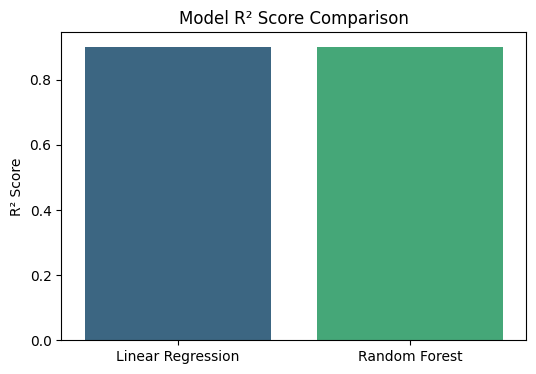

In [16]:
plt.figure(figsize=(6,4))
models = ['Linear Regression', 'Random Forest']
scores = [r2_lr, r2_rf]
sns.barplot(x=models, y=scores, palette='viridis')
plt.title("Model R² Score Comparison")
plt.ylabel("R² Score")
plt.show()

🌟 Step 10: Feature Importance (Random Forest)

/tmp/ipython-input-3823028284.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette='magma')


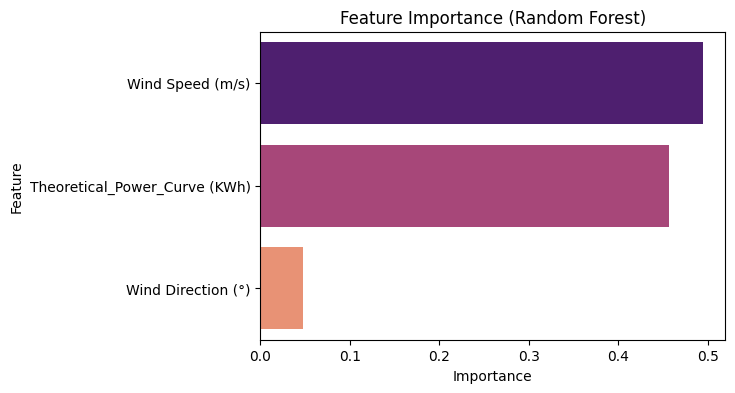

In [17]:
importances = rf_model.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=feat_imp, y=feat_imp.index, palette='magma')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()